In [1]:
import numpy as np

In [2]:
class SVM:
    def __init__(self, lr=.001, lambda_parameter=.01, n_iter=1000):
        self.lr = lr
        self.lambda_parameter = lambda_parameter
        self.n_iter = n_iter
        self.w = None
        self.b = None
        
    def fit(self, X, y):
        # formulate y to be 1 or -1
        y_ = np.where(y <= 0, -1, 1)
        n_samples, n_features = X.shape
        
        # initialize self.w, self.b
        self.w = np.zeros(n_features)
        self.b = 0
        
        for _ in range(self.n_iter):
            for index, xi in enumerate(X):
                condition = y_[index] * ( np.dot(self.w, xi) - self.b ) >= 1
                
                if condition:
                    self.w -= self.lr * ( 2 * self.lambda_parameter * self.w )
                else:
                    self.w -= self.lr * ( 2 * self.lambda_parameter * self.w - (y_[index] * xi) ) 
                    self.b -= self.lr * y_[index] 
    
    def predict(self, X):
        y_predicted = np.dot(X, self.w) - self.b
        return np.sign(y_predicted)
        

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [4]:
X, y = datasets.make_blobs(n_samples=500, n_features=2, centers=2, cluster_std=1.1, random_state=0)

In [5]:
y = np.where(y == 0, -1, 1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=40)

In [7]:
clf = SVM()
clf.fit(X_train, y_train)

In [8]:
print(clf.w)
clf.b

[ 0.53727028 -1.16484916]


-2.2589999999998622

In [9]:
from matplotlib import pyplot as plt

In [10]:
def visualize_SVM(X, y, SVM_clf):
    
    def calculate_hyperplane_coordinations(x, w, b, offset):
        return (-w[0]*x + b + offset) / w[1]
    
    fig, ax = plt.subplots()
    plt.scatter(X[:,0], X[:,1], marker='o', c=y)
    
    x0_1 = np.amin(X[:,0])
    x0_2 = np.amax(X[:,1])
    
    x1_1 = calculate_hyperplane_coordinations(x0_1, SVM_clf.w, SVM_clf.b, 0)
    x1_2 = calculate_hyperplane_coordinations(x0_2, SVM_clf.w, SVM_clf.b, 0)
    
    
    x1_1_minus = calculate_hyperplane_coordinations(x0_1, SVM_clf.w, SVM_clf.b, -1)
    x1_2_minus = calculate_hyperplane_coordinations(x0_2, SVM_clf.w, SVM_clf.b, -1)
    
    x1_1_plus = calculate_hyperplane_coordinations(x0_1, SVM_clf.w, SVM_clf.b, 1)
    x1_2_plus = calculate_hyperplane_coordinations(x0_2, SVM_clf.w, SVM_clf.b, 1)
    
    ax.plot([x0_1, x0_2], [x1_1, x1_2], 'y--')
    ax.plot([x0_1, x0_2], [x1_1_minus, x1_2_minus], 'k')
    ax.plot([x0_1, x0_2], [x1_1_plus, x1_2_plus], 'k')
    
    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])
    

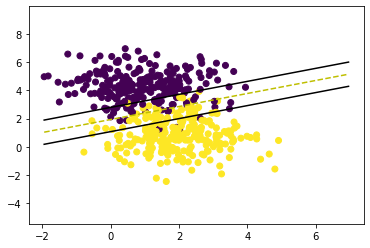

In [11]:
visualize_SVM(X, y, clf)

In [12]:
y_hat = clf.predict(X_test)
y_hat

array([-1.,  1., -1.,  1.,  1.,  1., -1.,  1., -1.,  1., -1., -1.,  1.,
       -1., -1.,  1., -1., -1., -1., -1.,  1., -1.,  1.,  1., -1.,  1.,
       -1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1., -1., -1.,
       -1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1.,
        1., -1., -1.,  1.,  1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1.,  1.,  1., -1.,
       -1., -1., -1., -1., -1., -1.,  1.,  1.,  1., -1., -1., -1., -1.,
       -1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1.,
        1., -1., -1.,  1.,  1.,  1., -1., -1.,  1., -1., -1.,  1.,  1.,
        1., -1., -1.,  1.,  1.,  1., -1.,  1.])

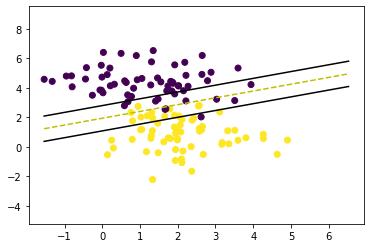

In [13]:
visualize_SVM(X_test, y_test, clf)

In [15]:
accuracy = sum(y_hat == y_test) / len(y_test)
print(f'accuracy = {accuracy * 100:.1f}%')

accuracy = 94.4%
